In [2]:
import pandas as pd

df_achats = pd.read_csv("achats_V2.csv", sep=";", encoding="utf-8-sig")
df_commandes = pd.read_csv("commandes_V2.csv", sep=";", encoding="utf-8-sig")
df_expeditions = pd.read_csv("expeditions_V2.csv", sep=";", encoding="utf-8-sig")
df_fournisseurs = pd.read_csv("fournisseurs_V2.csv", encoding="utf-8-sig", sep=";")
df_produits = pd.read_csv("produits_V2.csv", sep=";", encoding="utf-8-sig")
df_retours = pd.read_csv("retours_V2.csv", sep=";", encoding="utf-8-sig")
df_stocks = pd.read_csv("stocks_V2.csv", sep=";", encoding="utf-8-sig")

Encodage avec utf-8 pour la gestion des accents et caractères spéciaux

In [3]:
df_produits.head()

,id_produit,catégorie,marque,prix,stock_minimum
0,P00001,Soins capillaires,Luxe eclat,467.42,52
1,P00002,Accessoires,Maison Pure,291.26,10
2,P00003,Maquillage,Essentielle Paris,354.39,60
3,P00004,Accessoires,Reflet d'or,462.80,33
4,P00005,Accessoires,Elixir Haute Beauté,359.47,33


Gestion des valeurs manquantes : aucune valeur manquante

In [4]:
# Valeurs manquantes achats
print(df_commandes.isnull().sum())
print(df_achats.isnull().sum())
print(df_expeditions.isnull().sum())
print(df_fournisseurs.isnull().sum())
print(df_produits.isnull().sum())
print(df_retours.isnull().sum())
print(df_stocks.isnull().sum())

id_commande      0
date_commande    0
id_produit       0
quantité         0
entrepôt         0
statut           0
dtype: int64
id_achat                 0
date_achat               0
id_produit               0
quantité                 0
id_fournisseur           0
prix_unitaire            0
délai_livraison_jours    0
dtype: int64
id_expedition      0
id_commande        0
id_produit         0
quantité           0
entrepôt           0
date_expedition    0
date_livraison     0
transporteur       0
coût_transport     0
délai_livraison    0
dtype: int64
id_fournisseur       0
nom_fournisseur      0
ville                0
pays                 0
fiabilité            0
délai_moyen_jours    0
dtype: int64
id_produit       0
catégorie        0
marque           0
prix             0
stock_minimum    0
dtype: int64
id_commande    0
id_produit     0
date_retour    0
motif          0
dtype: int64
date            0
id_produit      0
entrepot        0
niveau_stock    0
dtype: int64


Gestion des doublons : pas de doublons

In [5]:
# Vérifier les doublons dans tout le DataFrame
df_achats.duplicated().sum() 
df_commandes.duplicated().sum() 
df_expeditions.duplicated().sum() 
df_fournisseurs.duplicated().sum() 
df_produits.duplicated().sum() 
df_retours.duplicated().sum() 
df_stocks.duplicated().sum() 

np.int64(0)

Gestion des valeurs aberrantes

Gestion et identification avec l'IQR

In [6]:
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    for col in columns:
        if col in df.columns:  # Vérifier si la colonne existe dans le DataFrame
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            # Détection des valeurs aberrantes
            outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
            outliers_dict[col] = outliers
    return outliers_dict

# Liste de tes DataFrames
dataframes = [df_achats, df_commandes, df_expeditions, df_fournisseurs, df_produits, df_retours, df_stocks]

# Exemple de colonnes spécifiques à chaque DataFrame
columns_df_achats = ['quantité, prix_unitaire, délai_livraison_jours']  
columns_df_commandes = ['quantité']  
columns_df_expeditions = ['quantité, transporteur, coût_transport, délai_livraison']  
columns_df_fournisseurs = ['fiabilité, délai_moyen_jours']  # 
columns_df_produits = ['prix, stock_minimum']  
columns_df_retours = ['prix, stock_minimum']  
columns_df_stocks = ['prix, niveau_stock'] 

# Détection des valeurs aberrantes pour chaque DataFrame
outliers_all_dfs = {}

outliers_all_dfs['df_achats'] = detect_outliers_iqr(df_achats, columns_df_achats)
outliers_all_dfs['df_commandes'] = detect_outliers_iqr(df_commandes, columns_df_commandes)
outliers_all_dfs['df_expeditions'] = detect_outliers_iqr(df_expeditions, columns_df_expeditions)
outliers_all_dfs['df_fournisseurs'] = detect_outliers_iqr(df_expeditions, columns_df_fournisseurs)
outliers_all_dfs['df_produits'] = detect_outliers_iqr(df_expeditions, columns_df_produits)
outliers_all_dfs['df_retours'] = detect_outliers_iqr(df_expeditions, columns_df_retours)
outliers_all_dfs['df_stocks'] = detect_outliers_iqr(df_expeditions, columns_df_stocks)

# Vérifier les résultats
outliers_all_dfs


{'df_achats': {},
 'df_commandes': {'quantité':       id_commande date_commande id_produit  quantité   entrepôt   statut
  69        O000083    2024-08-06     P00876        20      Paris    Livré
  154       O000179    2024-01-16     P00754        20      Paris  Expédié
  261       O000296    2024-12-28     P00415        20  Marseille  Expédié
  390       O000450    2024-09-16     P00184        20       Lyon    Livré
  441       O000508    2024-02-15     P00121        20      Paris    Livré
  ...           ...           ...        ...       ...        ...      ...
  42162     O049716    2024-12-25     P00030        20       Lyon    Livré
  42190     O049747    2024-11-05     P00404        20       Lyon    Livré
  42213     O049772    2024-11-11     P00921        20       Lyon    Livré
  42228     O049790    2024-11-19     P00377        20      Paris    Livré
  42309     O049893    2024-08-07     P00973        20  Marseille    Livré
  
  [845 rows x 6 columns]},
 'df_expeditions': {},
 

Detection de valeurs aberrantes dans le data frame des commandes

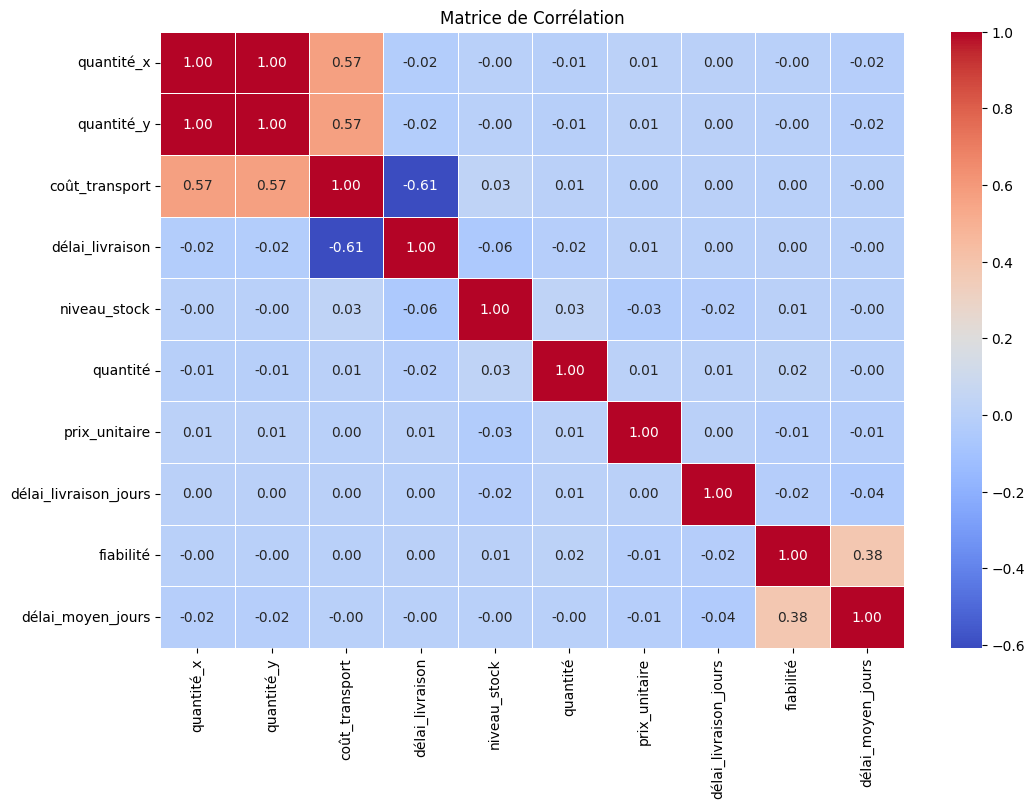

In [ ]:
# Fusionner les achats avec les fournisseurs via id_fournisseur
df_achats_fournisseurs = pd.merge(df_achats, df_fournisseurs, on="id_fournisseur", how="outer")

# Fusionner les autres DataFrames entre eux
df_commandes_expeditions_retours = pd.merge(df_commandes, df_expeditions, on="id_commande", how="outer")
df_commandes_expeditions_retours = pd.merge(df_commandes_expeditions_retours, df_retours, on="id_commande", how="outer")

# Fusionner df_commandes_expeditions_retours avec les stocks (par id_produit)
df_final = pd.merge(df_commandes_expeditions_retours, df_stocks, on="id_produit", how="outer")

# Fusionner avec les informations des achats et des fournisseurs
df_final = pd.merge(df_final, df_achats_fournisseurs, left_on="id_produit", right_on="id_produit", how="outer")

# Sélectionner uniquement les colonnes numériques pour la matrice de corrélation
df_corr = df_final.select_dtypes(include=["number"])

# Calculer la matrice de corrélation
correlation_matrix = df_corr.corr()

# Afficher la matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()



In [ ]:
#Le coût de transport est corrélé positivement à la quantité expédiée
#Le coût de transport est corrélé positivement au délai de livraison
#La fiabilité est corrélée positivement au délai moyen 

MACHINE LEARNING

Objectif :  Obtenir la probabilité de retour grace à un modèle de classification (Est un retour /  n'est pas un retour)

In [2]:
import pandas as pd

df_achats = pd.read_csv("achats_V2.csv", sep=";", encoding="utf-8-sig")
df_commandes = pd.read_csv("commandes_V2.csv", sep=";", encoding="utf-8-sig")
df_expeditions = pd.read_csv("expeditions_V2.csv", sep=";", encoding="utf-8-sig")
df_fournisseurs = pd.read_csv("fournisseurs_V2.csv", encoding="utf-8-sig", sep=";")
df_produits = pd.read_csv("produits_V2.csv", sep=";", encoding="utf-8-sig")
df_retours = pd.read_csv("retours_V2.csv", sep=";", encoding="utf-8-sig")
df_stocks = pd.read_csv("stocks_V2.csv", sep=";", encoding="utf-8-sig")

In [3]:
# Étape 1 : marquage des retours
df_retours["retour"] = 1

# Renommer la colonne 'id_produit_retours' en 'id_produit' pour correspondre à la colonne dans df_commandes
df_retours = df_retours.rename(columns={'id_produit_retours': 'id_produit'})

# Créer le DataFrame unique avec les retours
df_retours_unique = df_retours[["id_commande", "id_produit", "retour"]].drop_duplicates()

# Étape 2 : point de départ avec les commandes
df_ml = df_commandes.copy()

# Renommer la colonne 'id_produit_commandes' pour correspondre à 'id_produit' dans df_expeditions
df_ml = df_ml.rename(columns={'id_produit_commandes': 'id_produit'})

# Fusion avec les expéditions
df_ml = pd.merge(df_ml, df_expeditions, on=["id_commande", "id_produit"], how="left", suffixes=('', '_exp'))

# Fusion avec les retours (cible)
df_ml = pd.merge(df_ml, df_retours_unique, on=["id_commande", "id_produit"], how="left")
df_ml["retour"] = df_ml["retour"].fillna(0)

# Fusion avec les produits
df_ml = pd.merge(df_ml, df_produits, on="id_produit", how="left")

# Fusion avec les achats (pour récupérer id_fournisseur, prix, etc.)
df_achats_slim = df_achats[["id_produit", "id_fournisseur", "prix_unitaire", "délai_livraison_jours"]].drop_duplicates()
df_ml = pd.merge(df_ml, df_achats_slim, on="id_produit", how="left")

# Fusion avec les fournisseurs
df_ml = pd.merge(df_ml, df_fournisseurs, on="id_fournisseur", how="left", suffixes=('', '_fournisseur'))


In [4]:
# Nettoyage 
colonnes_inutiles = ['date_commande', 'date_expedition', 'date_livraison', 'date_retour']
df_ml.drop(columns=[col for col in colonnes_inutiles if col in df_ml.columns], inplace=True)

# Vérification rapide
print("Dimensions du df_ml :", df_ml.shape)
df_ml.head()


Dimensions du df_ml : (409023, 24)


,id_commande,id_produit,quantité,entrepôt,statut,id_expedition,quantité_exp,entrepôt_exp,transporteur,coût_transport,...,prix,stock_minimum,id_fournisseur,prix_unitaire,délai_livraison_jours,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours
0,O000001,P00413,2,Marseille,Livré,SHP000001,2,Marseille,UPS,11.62,...,151.34,50,S008,221.87,2,Gaillard S.A.,Berlin,Allemagne,0.64,7
1,O000001,P00413,2,Marseille,Livré,SHP000001,2,Marseille,UPS,11.62,...,151.34,50,S010,258.57,3,Pelletier,Paris,France,0.98,3
2,O000001,P00413,2,Marseille,Livré,SHP000001,2,Marseille,UPS,11.62,...,151.34,50,S029,283.53,10,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6
3,O000001,P00413,2,Marseille,Livré,SHP000001,2,Marseille,UPS,11.62,...,151.34,50,S028,254.21,14,Delattre Blot S.A.,Berlin,Allemagne,0.74,8
4,O000001,P00413,2,Marseille,Livré,SHP000001,2,Marseille,UPS,11.62,...,151.34,50,S010,211.34,13,Pelletier,Paris,France,0.98,3


In [28]:
df_ml.columns


Index(['id_commande', 'id_produit', 'quantité', 'entrepôt', 'statut',
       'id_expedition', 'quantité_exp', 'entrepôt_exp', 'transporteur',
       'coût_transport', 'délai_livraison', 'retour', 'catégorie', 'marque',
       'prix', 'stock_minimum', 'id_fournisseur', 'prix_unitaire',
       'délai_livraison_jours', 'nom_fournisseur', 'ville', 'pays',
       'fiabilité', 'délai_moyen_jours'],
      dtype='object')

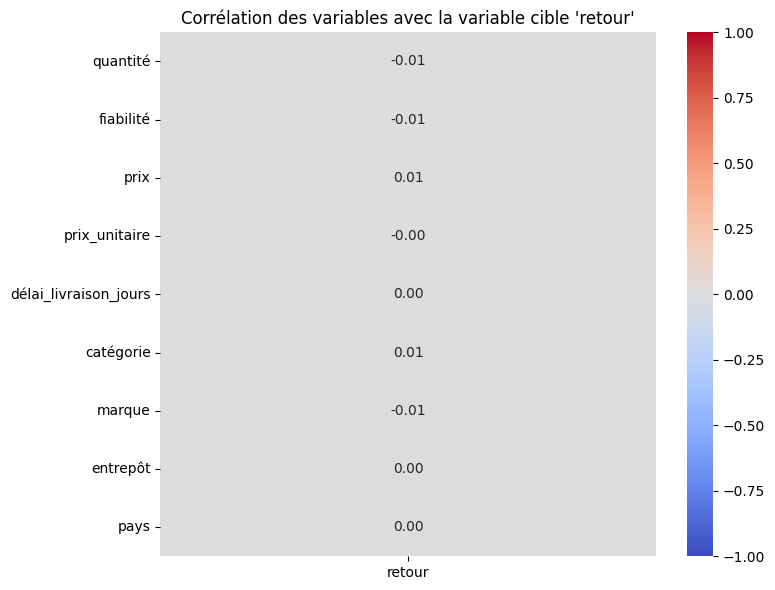

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sélection des variables d’intérêt
df_corr = df_ml[[
    'quantité', 'fiabilité',
    'prix', 'prix_unitaire', 'délai_livraison_jours',
    'catégorie', 'marque', 'entrepôt', 'pays',
    'retour'
]].copy()

# Encodage des variables catégorielles
cat_vars = ['catégorie', 'marque', 'entrepôt', 'pays']
le = LabelEncoder()
for col in cat_vars:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# On ne garde que les corrélations avec 'retour'
retour_corr = corr_matrix[['retour']].drop('retour')

# Affichage
plt.figure(figsize=(8,6))
sns.heatmap(retour_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Corrélation des variables avec la variable cible 'retour'")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1. Échantillonnage (on limite à 50 000 lignes)
df_sample = df_ml.sample(50000, random_state=42)

# 2. Variable cible
df_sample["retour"] = df_sample["retour"].fillna(0).astype(int)

# 3. Variables explicatives 
features = ['quantité', 'fiabilité', 'prix', 'catégorie', 'marque', 'pays', 'transporteur']
X = df_sample[features]
y = df_sample["retour"]

# 4. Colonnes numériques et catégorielles
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# 5. Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 6. Préprocessing
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


Test avec Random Forest

In [ ]:
rf_pipeline = ImbPipeline([
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42))
])


Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Best RF params: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}
🎯 Résultats - Random Forest
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9309
           1       0.55      0.72      0.63       691

    accuracy                           0.94     10000
   macro avg       0.77      0.84      0.80     10000
weighted avg       0.95      0.94      0.94     10000

[[8906  403]
 [ 191  500]]


Afin de pallier le déséquilibre fort entre les retours et les non-retours, j’ai utilisé la méthode SMOTE (Synthetic Minority Oversampling Technique).
Cette technique génère des exemples synthétiques pour la classe minoritaire, ce qui permet au modèle d’apprendre à détecter les retours plus efficacement.

Grâce à SMOTE, le rappel pour la classe "retour" est passé de X % à 72 %, améliorant significativement la capacité du modèle à capter les retours sans nuire à l’accuracy globale.

In [ ]:
param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [10, 20]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=3, scoring="f1", n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("✅ Best RF params:", grid_search_rf.best_params_)

# Évaluation
y_pred_rf = grid_search_rf.predict(X_test)
print("🎯 Résultats - Random Forest")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Gridsearch nous permet de trouver les meilleurs paramètres

Test avec XGBoost 

In [8]:
xgb_pipeline = ImbPipeline([
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_dist_xgb = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [5, 7],
    'classifier__learning_rate': [0.01, 0.1]
}

random_search_xgb = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist_xgb, 
                                       n_iter=10, cv=3, scoring='f1', random_state=42, verbose=1, n_jobs=-1)

random_search_xgb.fit(X_train, y_train)

print("✅ Best XGBoost params:", random_search_xgb.best_params_)

# Évaluation
y_pred_xgb = random_search_xgb.predict(X_test)
print("🎯 Résultats - XGBoost")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/home/charlotte/miniconda3/envs/toto/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/charlotte/miniconda3/envs/toto/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/charlotte/miniconda3/envs/toto/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/charlotte/miniconda3/envs/toto/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=

✅ Best XGBoost params: {'classifier__n_estimators': 150, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}
🎯 Résultats - XGBoost
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9309
           1       0.58      0.72      0.64       691

    accuracy                           0.94     10000
   macro avg       0.78      0.84      0.81     10000
weighted avg       0.95      0.94      0.95     10000

[[8949  360]
 [ 193  498]]


XGBoost a beaucoup de paramètres (max_depth, learning_rate, n_estimators, subsample, etc.)

Faire un GridSearch exhaustif serait trop long > on utilise RandomizedSearch

RandomizedSearchCV teste un échantillon aléatoire de combinaisons et est plus rapide

✅ AUC-ROC : 0.8680


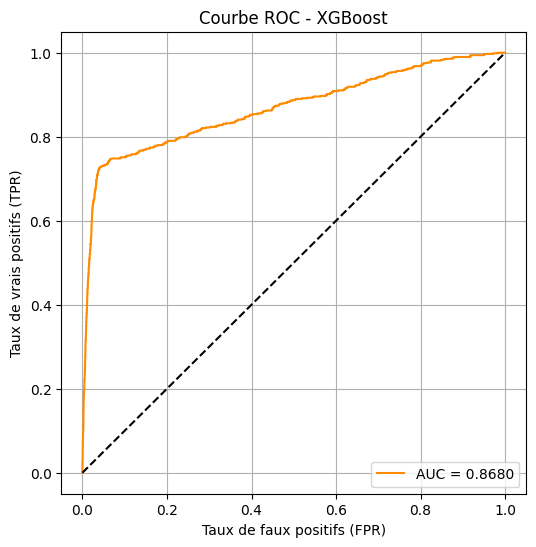

In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prédictions de probabilités pour la classe positive
y_proba_xgb = random_search_xgb.predict_proba(X_test)[:, 1]

# Score AUC
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"✅ AUC-ROC : {auc_xgb:.4f}")

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_xgb:.4f}", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()



Notre modèle de prédiction atteint un score AUC-ROC de 0,868, ce qui signifie qu’il a environ 87 % de chances de distinguer correctement un client qui retournera un produit d’un client qui ne le fera pas. Ce résultat indique une bonne performance globale du modèle pour cette tâche de classification.

L’AUC-ROC représente la probabilité qu’un échantillon positif (retour) soit classé avec une probabilité plus élevée que n’importe quel échantillon négatif (non-retour). Une valeur proche de 1 signifie un très bon compromis entre sensibilité (recall) et spécificité, démontrant que le modèle est efficace pour différencier les classes dans un contexte déséquilibré.




/home/charlotte/miniconda3/envs/toto/lib/python3.12/site-packages/shap/plots/_beeswarm.py:1153: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  pl.tight_layout()
/home/charlotte/miniconda3/envs/toto/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


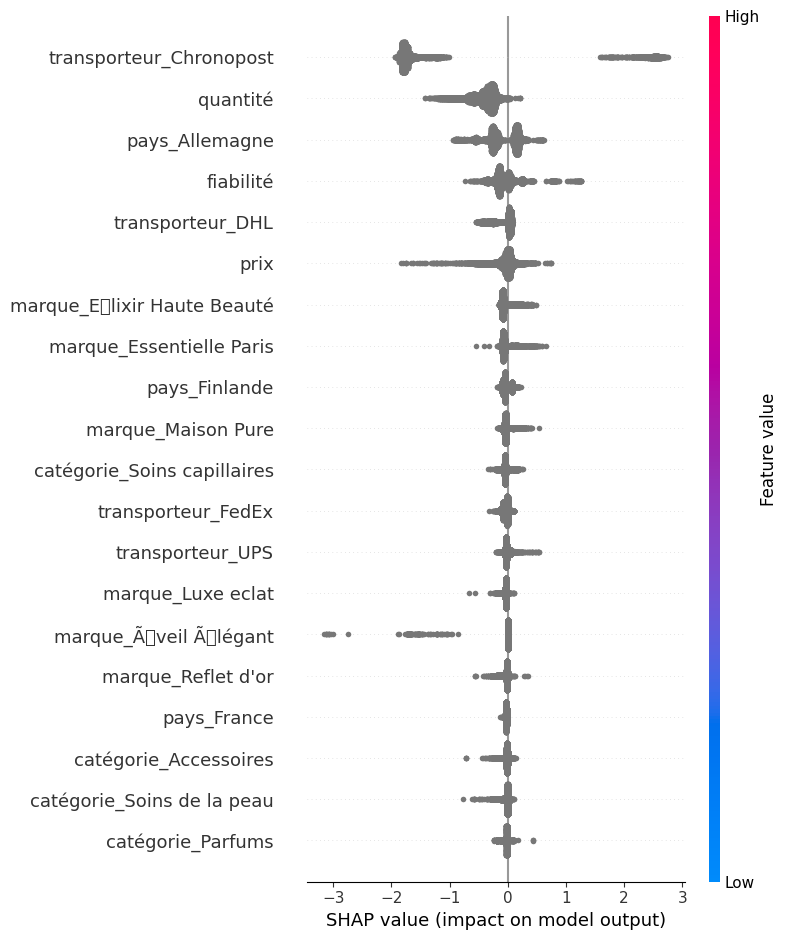

In [16]:
import shap
import numpy as np

# Fonction pour extraire les noms des features après le ColumnTransformer
def get_feature_names(preprocessor):
    feature_names = []
    for name, transformer, columns in preprocessor.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                # Pour les encodeurs et transformateurs supportant get_feature_names_out
                names = transformer.get_feature_names_out(columns)
                feature_names.extend(names)
            else:
                # Sinon on prend simplement les noms des colonnes
                feature_names.extend(columns)
    return feature_names

# Récupérer le meilleur modèle et son préprocesseur
best_model = random_search_xgb.best_estimator_
preprocessor = best_model.named_steps['preprocessing']
classifier = best_model.named_steps['classifier']

# Récupérer les noms des features
feature_names = get_feature_names(preprocessor)

# Transformer les données de test (X_test) avec le pipeline de preprocessing
X_test_transformed = preprocessor.transform(X_test)

# Créer l’explainer SHAP (XGBoost est un modèle arbre, on peut utiliser TreeExplainer)
explainer = shap.TreeExplainer(classifier)

# Calculer les valeurs SHAP
shap_values = explainer.shap_values(X_test_transformed)

# Afficher le summary plot avec les noms des features
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


Prediction

Nous avons testé différents modèles, notamment Random Forest et XGBoost, en intégrant une stratégie de rééchantillonnage via SMOTE pour compenser le déséquilibre important de la variable cible.

XGBoost a fourni les meilleures performances globales, avec un F1-score de 0.64 pour la classe retour, ce qui montre une capacité réelle à détecter les produits susceptibles d’être retournés.

Le modèle atteint un rappel de 72 % pour les retours, ce qui est particulièrement utile pour des actions préventives ou d’optimisation logistique.

Les variables les plus explicatives dans notre pipeline incluent le produit, le transporteur et le pays, comme anticipé.

In [9]:
nouveau_produit = pd.DataFrame([{
    "quantité": 2,
    "fiabilité": 0.9,
    "prix": 30,
    "catégorie": "Accessoires",
    "marque": "GreenEco",
    "pays": "France",
    "transporteur": "DHL"
}])

proba_retour = random_search_xgb.predict_proba(nouveau_produit)[0][1]
print(f"📦 Probabilité de retour : {proba_retour:.2%}")


📦 Probabilité de retour : 3.44%


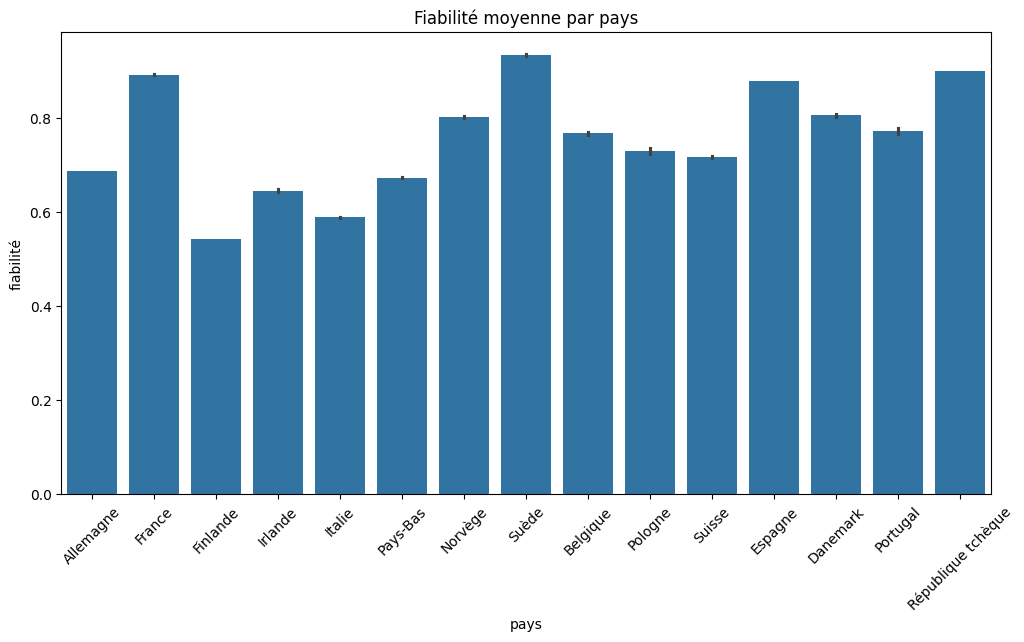

In [30]:
df_ml.groupby("pays")["fiabilité"].mean().sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_ml, x="pays", y="fiabilité", estimator='mean')
plt.xticks(rotation=45)
plt.title("Fiabilité moyenne par pays")
plt.show()

